# **Breast Cancer Prediction**

In [1]:
# Installing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Importing the dataset
from sklearn import datasets

In [3]:
# Load the breast cancer dataset
data = datasets.load_breast_cancer()

In [4]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [5]:
X = data["data"]

In [6]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [8]:
X_scaled.shape

(569, 30)

In [9]:
y = data["target"]

In [10]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [11]:
y.shape

(569,)

In [12]:
# Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 42)

In [13]:
# Initialize a dictionary to store the accuracy scores
results = {}

In [14]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

def train_logistic_regression(X_train, y_train, X_test, cv = 5):
    # Initialize model
    lr_model = LogisticRegression(max_iter = 10000, random_state = 2)

    # Fit the model
    lr_model = lr_model.fit(X_train, y_train)

    # Training Score
    train_score = lr_model.score(X_train, y_train)

    # Cross-Validation score (mean)
    cv_scores = cross_val_score(lr_model, X_train, y_train, cv = cv).mean()
    
    # Make predictions on test set
    predictions = lr_model.predict(X_test)
    return train_score, predictions, cv_scores



In [15]:
lr_train, preds, lr_cv_scores = train_logistic_regression(X_train, y_train, X_test)

In [16]:
results["Logistic Regression"] = accuracy_score(y_test, preds)

In [17]:
lr_test = accuracy_score(y_test, preds)

In [18]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98        63
           1       0.99      0.98      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [19]:
print(confusion_matrix(y_test, preds))

[[ 62   1]
 [  2 106]]


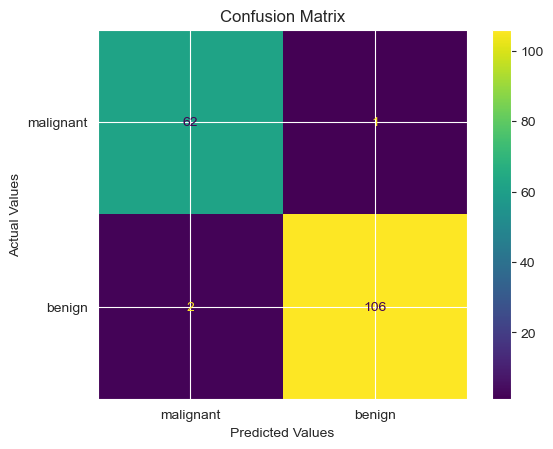

In [20]:
ConfusionMatrixDisplay(confusion_matrix(y_test, preds), display_labels = data.target_names).plot()
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix")
plt.show()

In [21]:
print(f"Logistic Regression | Training score: {lr_train * 100:.2f}% | Test score: {lr_test * 100:.2f} | CV scores: {lr_cv_scores * 100:.2f}%")

Logistic Regression | Training score: 98.74% | Test score: 98.25 | CV scores: 97.48%


In [22]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

def train_decision_tree(X_train, y_train, X_test, cv = 5):
    # Initialize model
    dt_model = DecisionTreeClassifier(max_depth = 5, random_state = 2,max_leaf_nodes = 5, max_features = 5)

    # Fit the model
    dt_model = dt_model.fit(X_train, y_train)

    # Training score
    train_score = dt_model.score(X_train, y_train)

    # Cross-Validation score (mean)
    cv_scores = cross_val_score(dt_model, X_train, y_train, cv = cv).mean()
    
    # Make predictions on test set
    predictions = dt_model.predict(X_test)
    return train_score, predictions, cv_scores

In [23]:
dt_train, preds, dt_cv_scores = train_decision_tree(X_train, y_train, X_test)

In [24]:
results["Decision Tree"] = accuracy_score(y_test, preds)

In [25]:
dt_test = accuracy_score(y_test, preds)

In [26]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        63
           1       0.97      0.94      0.96       108

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171



In [27]:
print(confusion_matrix(y_test, preds))

[[ 60   3]
 [  6 102]]


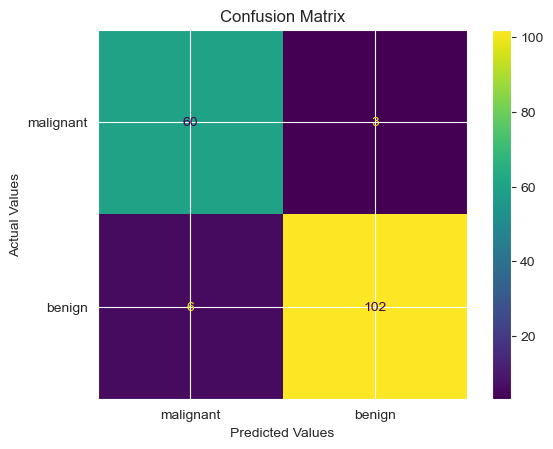

In [28]:
ConfusionMatrixDisplay(confusion_matrix(y_test, preds), display_labels = data.target_names).plot()
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix")
plt.show()

In [29]:
print(f"Decision Tree | Train Accuracy: {dt_train * 100:.2f}% | Test Accuracy: {dt_test * 100:.2f}% | CV scores: {dt_cv_scores * 100:.2f}%")

Decision Tree | Train Accuracy: 96.48% | Test Accuracy: 94.74% | CV scores: 92.96%


In [30]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

def train_random_forest(X_train, y_train, X_test, cv = 5):
    # Initialize model
    rf_model = RandomForestClassifier(n_estimators = 1000)

    # Fit the model
    rf_model = rf_model.fit(X_train, y_train)

    # Training score
    train_score = rf_model.score(X_train, y_train)

    # Cross-Validation score (mean)
    cv_scores = cross_val_score(rf_model, X_train, y_train, cv = cv).mean()

    # make predictions
    predictions = rf_model.predict(X_test)
    return train_score, predictions, cv_scores

In [31]:
rf_train, preds, rf_cv_scores = train_random_forest(X_train, y_train, X_test)

In [32]:
results["Random Forest"] = accuracy_score(y_test, preds)

In [33]:
rf_test = accuracy_score(y_test, preds)

In [34]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        63
           1       0.96      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [35]:
print(confusion_matrix(y_test, preds))

[[ 59   4]
 [  2 106]]


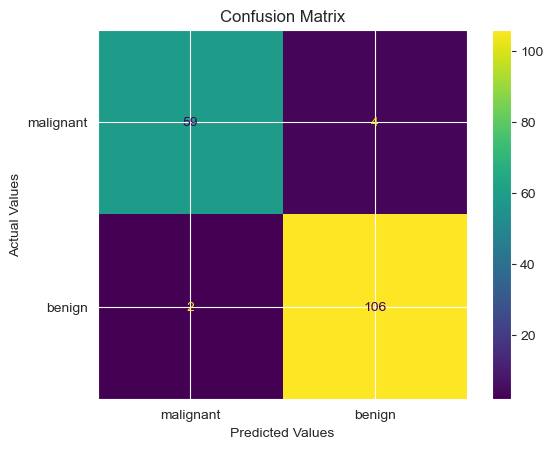

In [36]:
ConfusionMatrixDisplay(confusion_matrix(y_test, preds), display_labels = data.target_names).plot()
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix")
plt.show()

In [37]:
print(f"Randon Forest | Train Accuracy: {rf_train * 100:.2f}% | Test Accuracy: {rf_test * 100:.2f}% | CV scores: {rf_cv_scores * 100:.2f}%")

Randon Forest | Train Accuracy: 100.00% | Test Accuracy: 96.49% | CV scores: 95.47%


- K-Nearest Neighbors

In [38]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

def train_knn(X_train, y_train, X_test, cv = 5):
    # Initialize model
    knn_model = KNeighborsClassifier(n_neighbors = 5)

    # Fit the model
    knn_model = knn_model.fit(X_train, y_train)

    # Training score
    train_score = knn_model.score(X_train, y_train)

    # Cross-Validation score (mean)
    cv_scores = cross_val_score(knn_model, X_train, y_train, cv = cv).mean()
    
    # Make predictions on test set
    predictions = knn_model.predict(X_test)
    return train_score, predictions, cv_scores

In [39]:
knn_train, preds, knn_cv_scores = train_knn(X_train, y_train, X_test)

In [40]:
results["K Nearest Neighbours"] = accuracy_score(y_test, preds)

In [41]:
knn_test = accuracy_score(y_test, preds)

In [42]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94        63
           1       0.96      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



In [43]:
print(confusion_matrix(y_test, preds))

[[ 59   4]
 [  3 105]]


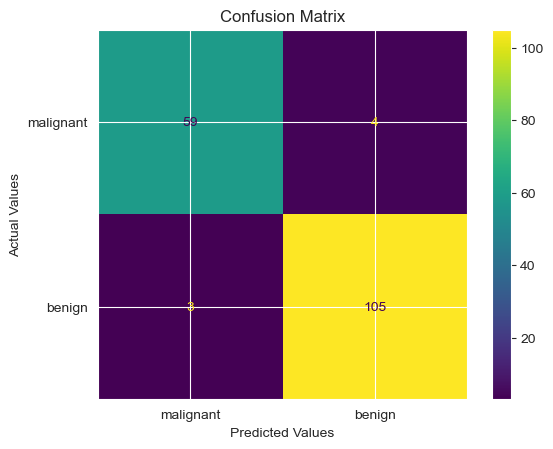

In [44]:
ConfusionMatrixDisplay(confusion_matrix(y_test, preds), display_labels = data.target_names).plot()
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix")
plt.show()

In [45]:
print(f"K-Nearest Neighbors | Train Accuracy: {knn_train * 100:.2f}% | Test Accuracy: {knn_test * 100:.2f}% | CV scores: {knn_cv_scores * 100:.2f}%")

K-Nearest Neighbors | Train Accuracy: 97.74% | Test Accuracy: 95.91% | CV scores: 95.47%


- Support Vector Machines

In [46]:
# SVM
from sklearn.svm import SVC

def train_svm(X_train, y_train, X_test, cv = 5):
    # Initialize model
    svm_model = SVC()

    # Fit model
    svm_model.fit(X_train, y_train)

    # Training score
    train_score = svm_model.score(X_train, y_train)

    # Cross-validation score (mean)
    cv_scores = cross_val_score(svm_model, X_train, y_train, cv = cv).mean()

    # Make predictions on test set
    predictions = svm_model.predict(X_test)

    return train_score, predictions, cv_scores

In [47]:
svm_train, preds, svm_cv_scores = train_svm(X_train, y_train, X_test)

In [48]:
results["Support Vector Machine"] = accuracy_score(y_test, preds)

In [49]:
svm_test = accuracy_score(y_test, preds)

In [50]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        63
           1       0.98      0.97      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



In [51]:
print(confusion_matrix(y_test, preds))

[[ 61   2]
 [  3 105]]


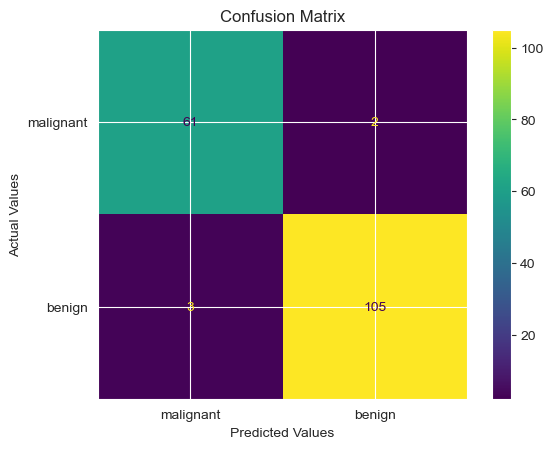

In [52]:
ConfusionMatrixDisplay(confusion_matrix(y_test, preds), display_labels = data.target_names).plot()
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix")
plt.show()

In [53]:
print(f"Support Vector Machines | Train Accuracy: {svm_train * 100:.2f}% |Test Accuracy: {svm_test * 100:.2f}% | CV scores: {svm_cv_scores * 100:.2f}%")

Support Vector Machines | Train Accuracy: 98.74% |Test Accuracy: 97.08% | CV scores: 96.73%


- Naive Bayes

In [54]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

def train_naive_bayes(X_train, y_train, X_test, cv = 5):
    # Initialize model
    nb_model = GaussianNB()

    # Fit model
    nb_model.fit(X_train, y_train)

    # Training score
    train_score = nb_model.score(X_train, y_train)

    # Cross-Validation score (mean)
    cv_scores = cross_val_score(nb_model, X_train, y_train, cv = cv).mean()

    # Make predictions on test set
    predictions = nb_model.predict(X_test)

    return train_score, predictions, cv_scores

In [55]:
nb_train, preds, nb_cv_scores = train_naive_bayes(X_train, y_train, X_test)

In [56]:
results["Naive Bayes"] = accuracy_score(y_test, preds)

In [57]:
nb_test = accuracy_score(y_test, preds)

In [58]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91        63
           1       0.94      0.95      0.95       108

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



In [59]:
print(confusion_matrix(y_test, preds))

[[ 57   6]
 [  5 103]]


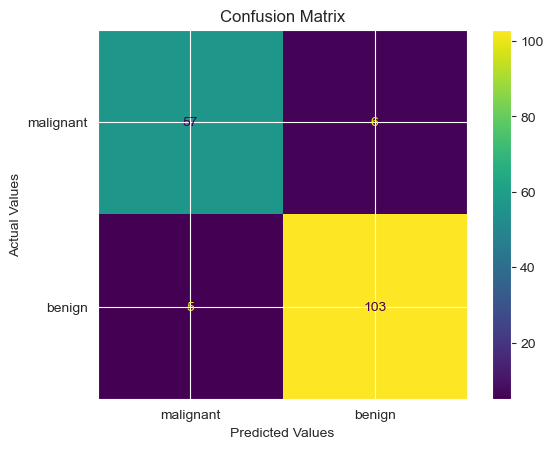

In [60]:
ConfusionMatrixDisplay(confusion_matrix(y_test, preds), display_labels = data.target_names).plot()
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix")
plt.show()

In [61]:
print(f"Naive Bayes | Train Accuracy: {nb_train * 100:.2f}% | Test Accuracy: {nb_test * 100:.2f}% | CV scores: {nb_cv_scores * 100:.2f}%")

Naive Bayes | Train Accuracy: 94.22% | Test Accuracy: 93.57% | CV scores: 93.22%


- Gradient Boosting

In [62]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

def train_gradient_boosting(X_train, y_train, X_test, cv = 5):
    # Initialize model
    gb_model = GradientBoostingClassifier()

    # Fit model
    gb_model.fit(X_train, y_train)

    # Training score
    train_score = gb_model.score(X_train, y_train)

    # Cross-Validation score (mean)
    cv_scores = cross_val_score(gb_model, X_train, y_train, cv = cv).mean()

    # Make predictions on test set
    predictions = gb_model.predict(X_test)

    return train_score, predictions, cv_scores

In [63]:
gb_train, preds, gb_cv_scores = train_gradient_boosting(X_train, y_train, X_test)

In [64]:
results["Gradient Boosting"] = accuracy_score(y_test, preds)

In [65]:
gb_test = accuracy_score(y_test, preds)

In [66]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94        63
           1       0.96      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



In [67]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94        63
           1       0.96      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



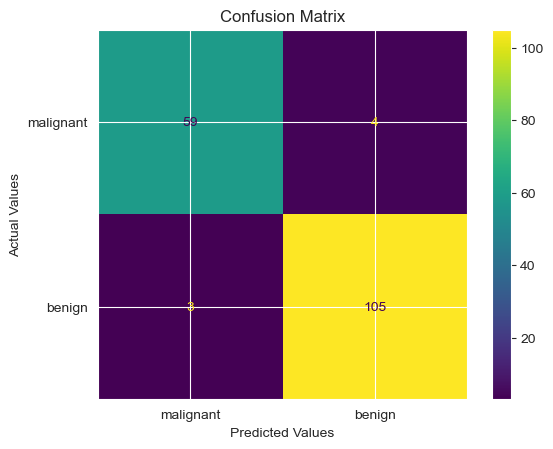

In [68]:
ConfusionMatrixDisplay(confusion_matrix(y_test, preds), display_labels = data.target_names).plot()
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix")
plt.show()

In [69]:
print(f"Gradient Boosting | Train Accuracy: {gb_train * 100:.2f}% | Test Accuracy: {gb_test * 100:.2f}% | CV scores: {gb_cv_scores * 100:.2f}%")

Gradient Boosting | Train Accuracy: 100.00% | Test Accuracy: 95.91% | CV scores: 95.48%


In [70]:
results

{'Logistic Regression': 0.9824561403508771,
 'Decision Tree': 0.9473684210526315,
 'Random Forest': 0.9649122807017544,
 'K Nearest Neighbours': 0.9590643274853801,
 'Support Vector Machine': 0.9707602339181286,
 'Naive Bayes': 0.935672514619883,
 'Gradient Boosting': 0.9590643274853801}

In [71]:
results = dict(sorted(results.items(), key = lambda item: item[1]))

In [72]:
results

{'Naive Bayes': 0.935672514619883,
 'Decision Tree': 0.9473684210526315,
 'K Nearest Neighbours': 0.9590643274853801,
 'Gradient Boosting': 0.9590643274853801,
 'Random Forest': 0.9649122807017544,
 'Support Vector Machine': 0.9707602339181286,
 'Logistic Regression': 0.9824561403508771}

In [73]:
for model_name, score in results.items():
    print(f"{model_name} : {score * 100:.2f}%")

Naive Bayes : 93.57%
Decision Tree : 94.74%
K Nearest Neighbours : 95.91%
Gradient Boosting : 95.91%
Random Forest : 96.49%
Support Vector Machine : 97.08%
Logistic Regression : 98.25%
